# Ice Diagnostics

In [1]:
from glob import glob
import os
import xarray as xr
import cartopy
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature
%matplotlib inline
from IPython.display import HTML

In [2]:
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [3]:
DataDir = '/g/data3/hh5/tmp/cosima/mom01v5'
expt = 'KDS75'

In [4]:
DataDir = '/g/data3/hh5/tmp/cosima/access-om2-01'
expt = '01deg_jra55v13_ryf8485_spinup6'

In [5]:
expdir = os.path.join(DataDir, expt)
# dataFileList = glob(os.path.join(expdir, 'output*/ice_month.nc'))
# dataFileList = glob(os.path.join(expdir, 'output*/ice/OUTPUT/iceh.\d+-\d+.nc'))

dataFileList = glob(os.path.join(expdir, 'output*/ice/OUTPUT/iceh.*.nc'))

dataFileList.sort()

In [6]:
dataFileList

['/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh.0001-01-01.nc',
 '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh.0001-01-02.nc',
 '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh.0001-01-03.nc',
 '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh.0001-01-04.nc',
 '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh.0001-01-05.nc',
 '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh.0001-01-06.nc',
 '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh.0001-01-07.nc',
 '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh.0001-01-08.nc',
 '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/output000/ice/OUTPUT/iceh

In [7]:
# gridFileList = glob(os.path.join(expdir, 'output*/ocean_grid.nc'))

gridFileList = glob(os.path.join(expdir, 'output*/ocean/ocean_grid.nc'))

gridFileList.sort()

In [8]:
dsx_grid = xr.open_dataset(gridFileList[0], decode_times=False)
area_t = dsx_grid.area_t

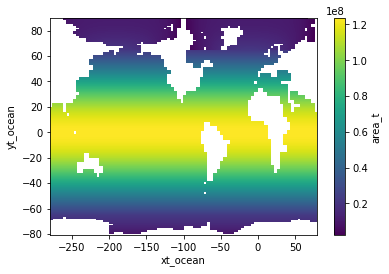

In [9]:
dsx_grid.area_t.plot()

From `diag_table`


Saved in `ice_month.nc`

CN, HI, HS
averaged globally over each month


In [10]:
dsx = xr.open_mfdataset(dataFileList[:12], decode_times=False, concat_dim='time')

[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100

There is an outstanding issue with year outside of a given range.  Artificially shift the years to years since 2000.

In [11]:
dsx.time.attrs['units'] = 'days since 2000-01-01 00:00:00'
# dsx.average_T1.attrs['units'] = 'days since 2000-01-01 00:00:00'
# dsx.average_T2.attrs['units'] = 'days since 2000-01-01 00:00:00'
dsx = xr.decode_cf(dsx)

[########################################] | 100% Completed |  0.1s
[                                        ] | 0% Completed |  0.0s

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/conventions.py:1037: UserWarning: CF decoding is overwriting dtype on variable 'TLON'
  .format(name))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/conventions.py:1037: UserWarning: CF decoding is overwriting dtype on variable 'TLAT'
  .format(name))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/conventions.py:1037: UserWarning: CF decoding is overwriting dtype on variable 'ULON'
  .format(name))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/conventions.py:1037: UserWarning: CF decoding is overwriting dtype on variable 'ULAT'
  .format(name))


[########################################] | 100% Completed |  0.1s


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/conventions.py:1037: UserWarning: CF decoding is overwriting dtype on variable 'tmask'
  .format(name))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/conventions.py:1037: UserWarning: CF decoding is overwriting dtype on variable 'blkmask'
  .format(name))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/conventions.py:1037: UserWarning: CF decoding is overwriting dtype on variable 'tarea'
  .format(name))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/conve

## Ice area

In [16]:
aice = dsx.aice # fractional ice cover
area = aice * area_t


[########################################] | 100% Completed |  1.8s


MemoryError: 

## Annual ice volume -- NB: calculation looks wrong!

In [15]:
# HI = dsx.sel(yt=slice(-90, -60)).HI

# HI = dsx.sel(TLAT=slice(-90, -60)).HI

HI = dsx.aice


south_area_t = area_t.sel(yt_ocean=slice(-90,-60))

HI

<xarray.DataArray 'aice' (time: 12, nj: 2700, ni: 3600)>
[116640000 values with dtype=float64]
Coordinates:
    TLON     (nj, ni) float64 ...
    TLAT     (nj, ni) float64 ...
    ULON     (nj, ni) float64 ...
    ULAT     (nj, ni) float64 ...
  * time     (time) datetime64[ns] 2000-01-02 2000-01-03 2000-01-04 ...
Dimensions without coordinates: nj, ni
Attributes:
    units:          1
    long_name:      ice area  (aggregate)
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged

In [13]:
volume = south_area_t.values * HI
volume.name = 'Volume'

[########################################] | 100% Completed |  2.8s


ValueError: operands could not be broadcast together with shapes (490,3600) (12,2700,3600) 

In [ ]:
volume.sum(dim='yt').sum(dim='xt').plot(marker='o')

In [ ]:
import matplotlib as mpl
from matplotlib import rc

rc('animation', ffmpeg_path='/short/v45/jm0634/conda/envs/my_analysis3/bin/ffmpeg')
rc('animation', html='html5')

In [ ]:
plt.figure(figsize=[8,8])
ax1 = plt.subplot(1,1,1, projection=ccrs.SouthPolarStereo())
#ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND)
#ax1.add_feature(cartopy.feature.OCEAN)
ax1.coastlines()
#ax1.stock_img()
ax1.gridlines()

# quadmesh = dsx.HI.isel(time=0)\
#             .sel(yt=slice(-90, -60))\
#             .plot\
#             .pcolormesh(ax=ax1, 
#                         transform=ccrs.PlateCarree(),
#                         vmax=2)

#             .sel(yt=slice(-90, -60))\

quadmesh = dsx.aice.isel(time=0)\
            .sel(nj=slice(200,500))\
            .plot\
            .pcolormesh(ax=ax1, 
                        transform=ccrs.PlateCarree(),
                        vmax=2)

In [ ]:
slice(1,10)

In [ ]:
import matplotlib.animation as animation

fig = plt.figure(figsize=[8,8])

ax1 = plt.subplot(1,1,1, projection=ccrs.SouthPolarStereo())
#ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND)
#ax1.add_feature(cartopy.feature.OCEAN)
ax1.coastlines()
#ax1.stock_img()
ax1.gridlines()

quadmesh = dsx.HI.isel(time=0).sel(yt=slice(-90, 
                                 -60)).plot(ax=ax1, 
                                            transform=ccrs.PlateCarree(),
                                            vmax=2)
def animate(i):
    print(i)
    da = dsx.HI.isel(time=i).sel(yt=slice(-90,-60))
    quadmesh.set_array(da.to_masked_array().ravel())
    ax1.set_title('time = {}'.format(da.time.values))
    return quadmesh, ax1.title

def init_func():
    return quadmesh,

In [ ]:
?slice

In [ ]:
ani = animation.FuncAnimation(fig, animate, 6, 
                              init_func=init_func,
                              interval=1000, blit=True, repeat_delay=3000)

In [ ]:
! module load /projects/v45/ffmpeg

In [ ]:
ani